<a href="https://colab.research.google.com/github/sasank484/Analysis-on-pandemic-s-impact-on-healthcare-system-and-happiness-index-using-Machine-algorithms/blob/main/capstoner2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimisation for Machine Learning algorithms in analysing healthcare systems

# Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
corona_dataset_csv = pd.read_csv("/content/drive/MyDrive/capstone/RAW_global_confirmed_cases.csv")
corona_dataset_csv


,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23
0,Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,...,207262,207310,207399,207438,207460,207493,207511,207550,207559,207616
1,Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,...,333731,333749,333749,333751,333751,333776,333776,333806,333806,333811
2,Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,...,271193,271194,271198,271198,271202,271208,271217,271223,271228,271229
3,Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47686,47751,47751,47751,47751,47751
4,Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,104973,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,NaN,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334021,334066,334108,334196,334294,334425,334425,334629


In [ ]:
corona_dataset_csv.shape

(289, 1080)

In [ ]:
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)

In [ ]:
corona_dataset_csv.head(10)

,Country/Region,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/23/22,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23
0,Afghanistan,NaN,0,0,0,0,0,0,0,0,...,207262,207310,207399,207438,207460,207493,207511,207550,207559,207616
1,Albania,NaN,0,0,0,0,0,0,0,0,...,333731,333749,333749,333751,333751,333776,333776,333806,333806,333811
2,Algeria,NaN,0,0,0,0,0,0,0,0,...,271193,271194,271198,271198,271202,271208,271217,271223,271228,271229
3,Andorra,NaN,0,0,0,0,0,0,0,0,...,47686,47686,47686,47686,47686,47751,47751,47751,47751,47751
4,Angola,NaN,0,0,0,0,0,0,0,0,...,104973,104973,104973,104973,105095,105095,105095,105095,105095,105095
5,Antarctica,NaN,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,Antigua and Barbuda,NaN,0,0,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,Argentina,NaN,0,0,0,0,0,0,0,0,...,9829236,9829236,9829236,9891139,9891139,9891139,9891139,9891139,9891139,9891139
8,Armenia,NaN,0,0,0,0,0,0,0,0,...,445881,445881,445881,445976,445976,445976,445976,445976,445976,445976
9,Australia,Australian Capital Territory,0,0,0,0,0,0,0,0,...,224902,224902,224902,224902,224902,224902,224902,224902,224902,224902


 # Aggregating the rows with country

In [ ]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

<ipython-input-7-06cc07508d05>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
corona_dataset_aggregated.head(10).sum(axis=1)

Country/Region
Afghanistan             116011311
Albania                 163172170
Algeria                 164559665
Andorra                  21342641
Angola                   52978727
Antarctica                   4224
Antigua and Barbuda       3700153
Argentina              4953677602
Armenia                 255590768
Australia              2751722839
dtype: int64

In [ ]:
corona_dataset_aggregated.shape

(201, 1076)

# Visualizing data related to a country for example India,China,Spain,Italy

<Axes: >

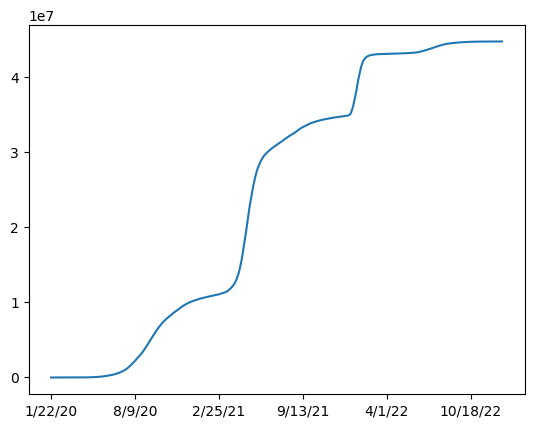

In [ ]:
corona_dataset_aggregated.loc['India'].plot()

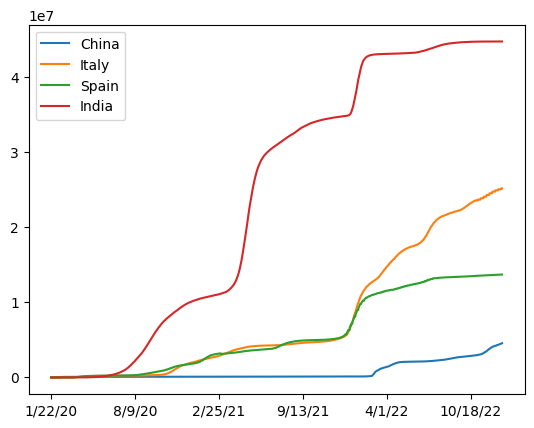

In [ ]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
corona_dataset_aggregated.loc['India'].plot()
plt.legend()

##  TO GET THE RATE AT WHICH CASES ARE GROWING(DIFFERENTIATING THE CURVE)

<Axes: >

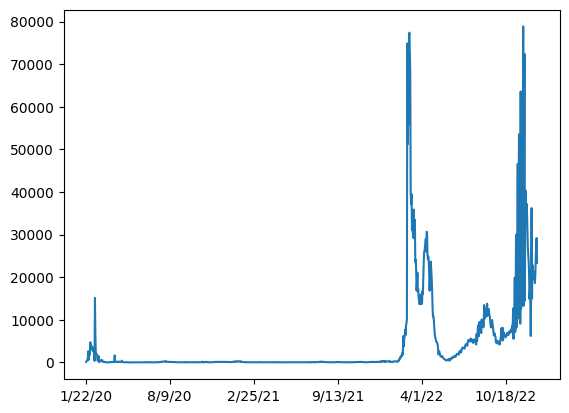

In [ ]:
corona_dataset_aggregated.loc['China'].diff().plot()

<Axes: >

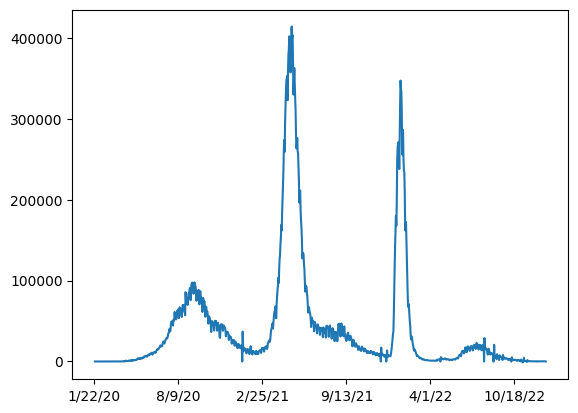

In [ ]:
corona_dataset_aggregated.loc['India'].diff().plot()

## Find max infection rates for China and India

In [ ]:
corona_dataset_aggregated.loc['China'].diff().max()

78859.0

In [ ]:
corona_dataset_aggregated.loc['India'].diff().max()

414188.0

In [ ]:
corona_dataset_aggregated.loc['India',:]

1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
              ...   
12/28/22    44679139
12/29/22    44679382
12/30/22    44679608
12/31/22    44679873
1/1/23      44679873
Name: India, Length: 1076, dtype: int64

# Finding average infection rates

In [ ]:
corona_dataset_aggregated.loc['China'].diff().mean()

4241.786046511628

In [ ]:
corona_dataset_aggregated.loc['India'].diff().mean()

41562.67255813954

## Find maximum infection rate for all of the countries.

In [ ]:
countries = list(corona_dataset_aggregated.index)
ave_infection_rates = []
for country in countries :
    ave_infection_rates.append(corona_dataset_aggregated.loc[country].diff().mean())
corona_dataset_aggregated['mean infection rate'] = ave_infection_rates

In [ ]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,mean infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,193.131163
Albania,0,0,0,0,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,310.521860
Algeria,0,0,0,0,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,252.306047
Andorra,0,0,0,0,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,44.419535
Angola,0,0,0,0,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,97.762791


# Create a new dataframe with only needed column


In [ ]:
corona_data = pd.DataFrame(corona_dataset_aggregated['mean infection rate'])

In [ ]:
corona_data.head(10)

,mean infection rate
Country/Region,
Afghanistan,193.131163
Albania,310.521860
Algeria,252.306047
Andorra,44.419535
Angola,97.762791
Antarctica,0.010233
Antigua and Barbuda,8.470698
Argentina,9201.059535
Armenia,414.861395


## Importing the world happiness report

In [ ]:
world_happiness_report = pd.read_csv("/content/drive/MyDrive/capstone/world_happiness_report_2022.csv")
world_happiness_report.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [ ]:
world_happiness_report.dtypes

RANK                              int64
Country                          object
Happiness score                 float64
Whisker-high                    float64
Whisker-low                     float64
Dystopia (1.83) + residual      float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [ ]:
world_happiness_report.shape

(146, 12)

## Dropping useless Columns

In [ ]:
columns_to_dropped = ['Whisker-high','Whisker-low','Dystopia (1.83) + residual','RANK','Happiness score','Generosity','Perceptions of corruption']
world_happiness_report.drop(columns_to_dropped,axis=1 , inplace=True)

In [ ]:
world_happiness_report.head()

,Country,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.892,1.258,0.775,0.736
1,Denmark,1.953,1.243,0.777,0.719
2,Iceland,1.936,1.320,0.803,0.718
3,Switzerland,2.026,1.226,0.822,0.677
4,Netherlands,1.945,1.206,0.787,0.651


## Changing the indices of the dataframe

In [ ]:
world_happiness_report.set_index(['Country'],inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country,,,,
Finland,1.892,1.258,0.775,0.736
Denmark,1.953,1.243,0.777,0.719
Iceland,1.936,1.320,0.803,0.718
Switzerland,2.026,1.226,0.822,0.677
Netherlands,1.945,1.206,0.787,0.651


## Joining the two datasets

In [ ]:
data = world_happiness_report.join(corona_data,how="inner")
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,mean infection rate
Finland,1.892,1.258,0.775,0.736,1337.865116
Denmark,1.953,1.243,0.777,0.719,3192.990698
Iceland,1.936,1.320,0.803,0.718,193.464186
Switzerland,2.026,1.226,0.822,0.677,4092.573023
Netherlands,1.945,1.206,0.787,0.651,8075.848372


In [ ]:
pip install covid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for covid: filename=covid-2.5.2-py3-none-any.whl size=10401 sha256=843fb1f64ab068d80436284d36f5a80b8de55de7013880c3469d8960b3378b9e
  Stored in directory: /root/.cache/pip/wheels/49/22/cd/0a4df8baf2a691c30046986b9c6a73b471b2d9867cf9db54e1
Successfully built covid


In [ ]:

from covid import Covid

covid = Covid()
covid.get_data()
len(covid.get_data())

200

In [ ]:
df=pd.DataFrame(data=covid.get_data())
df.head()

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,103804263,None,1123836,None,40.000000,-100.000000,1678454462000
1,81,India,44690738,None,530779,None,20.593684,78.962880,1678454462000
2,64,France,39866718,None,166176,None,46.227600,2.213700,1678454462000
3,68,Germany,38249060,None,168935,None,51.165691,10.451526,1678454462000
4,25,Brazil,37085675,None,699310,None,-14.235000,-51.925300,1678454462000


In [ ]:
df.drop(['latitude','longitude','id'],axis=1,inplace=True)
df.head()

,country,confirmed,active,deaths,recovered,last_update
0,US,103804263,None,1123836,None,1678454462000
1,India,44690738,None,530779,None,1678454462000
2,France,39866718,None,166176,None,1678454462000
3,Germany,38249060,None,168935,None,1678454462000
4,Brazil,37085675,None,699310,None,1678454462000


In [ ]:
df.set_index('country',inplace=True)
df.head()

,confirmed,active,deaths,recovered,last_update
country,,,,,
US,103804263,None,1123836,None,1678454462000
India,44690738,None,530779,None,1678454462000
France,39866718,None,166176,None,1678454462000
Germany,38249060,None,168935,None,1678454462000
Brazil,37085675,None,699310,None,1678454462000


In [ ]:
final=df.join(corona_data,how='inner')
len(final)

200

In [ ]:
final.head()

,confirmed,active,deaths,recovered,last_update,mean infection rate
US,103804263,None,1123836,None,1678454462000,93723.374884
India,44690738,None,530779,None,1678454462000,41562.672558
France,39866718,None,166176,None,1678454462000,36742.500465
Germany,38249060,None,168935,None,1678454462000,34762.666977
Brazil,37085675,None,699310,None,1678454462000,33796.540465


# Joining Data from covid library and World Happiness Index

In [ ]:
data1 = world_happiness_report.join(final,how="inner")

data1.head(10)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,confirmed,active,deaths,recovered,last_update,mean infection rate
Finland,1.892,1.258,0.775,0.736,1463644,None,8967,None,1678454462000,1337.865116
Denmark,1.953,1.243,0.777,0.719,3451036,None,8345,None,1678454462000,3192.990698
Iceland,1.936,1.320,0.803,0.718,209137,None,263,None,1678454462000,193.464186
Switzerland,2.026,1.226,0.822,0.677,4413911,None,14210,None,1678454462000,4092.573023
Netherlands,1.945,1.206,0.787,0.651,8712835,None,23707,None,1678454462000,8075.848372
Sweden,1.920,1.204,0.803,0.724,2699339,None,23777,None,1678454462000,2488.243721
Norway,1.997,1.239,0.786,0.728,1479506,None,5213,None,1678454462000,1372.230698
Israel,1.826,1.221,0.818,0.568,4804188,None,12329,None,1678454462000,4432.029767
New Zealand,1.852,1.235,0.752,0.680,2236114,None,2550,None,1678454462000,1954.645581
Austria,1.931,1.165,0.774,0.623,5961143,None,21970,None,1678454462000,5309.732093


## Scaling data  

In [ ]:
data1.drop(['active','recovered','last_update'],axis=1 ,inplace = True)
data1.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,confirmed,deaths,mean infection rate
Finland,1.892,1.258,0.775,0.736,1463644,8967,1337.865116
Denmark,1.953,1.243,0.777,0.719,3451036,8345,3192.990698
Iceland,1.936,1.320,0.803,0.718,209137,263,193.464186
Switzerland,2.026,1.226,0.822,0.677,4413911,14210,4092.573023
Netherlands,1.945,1.206,0.787,0.651,8712835,23707,8075.848372


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data1)

In [ ]:
from pandas import DataFrame
datax = DataFrame(scaled)
datax.head()

,0,1,2,3,4,5,6
0,0.880409,0.953030,0.865185,0.994595,0.032583,0.012646,0.032021
1,0.908795,0.941667,0.868148,0.971622,0.077060,0.011757,0.076663
2,0.900884,1.000000,0.906667,0.970270,0.004507,0.000197,0.004482
3,0.942764,0.928788,0.934815,0.914865,0.098609,0.020145,0.098311
4,0.905072,0.913636,0.882963,0.879730,0.194819,0.033728,0.194165


# Vaccinations

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/capstone/country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
df.fillna(value = 0, inplace = True)
df.total_vaccinations = df.total_vaccinations.astype(int)
df.people_vaccinated = df.people_vaccinated.astype(int)
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.astype(int)
df.daily_vaccinations = df.daily_vaccinations.astype(int)
df.total_vaccinations_per_hundred = df.total_vaccinations_per_hundred.astype(int)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(int)
date = df.date.str.split('-', expand =True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
86507,2022,03,25
86508,2022,03,26
86509,2022,03,27
86510,2022,03,28


In [ ]:
df['year'] = date[0]
df['month'] = date[1]
df['day'] = date[2]
df.year = pd.to_numeric(df.year)
df.month = pd.to_numeric(df.month)
df.day = pd.to_numeric(df.day)
df.date = pd.to_datetime(df.date)
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0,0,0,0,0,0,0,0,0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26


In [ ]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year,month,day
count,8.651200e+04,8.651200e+04,8.651200e+04,8.651200e+04,8.651200e+04,86512.000000,86512.000000,86512.000000,86512.000000,86512.000000,86512.000000,86512.000000
mean,2.315117e+07,8.451007e+06,6.341251e+06,1.106083e+05,1.308517e+05,40.175906,19.304131,15.720120,3245.792248,2021.199024,6.165711,15.719357
std,1.611037e+08,4.969867e+07,3.890729e+07,7.864756e+05,7.669487e+05,62.545324,28.586747,25.776157,3932.156455,0.408767,3.547866,8.743045
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.770000e+02,0.000000,0.000000,0.000000,629.000000,2021.000000,3.000000,8.000000
50%,1.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,7.245000e+03,0.000000,0.000000,0.000000,2036.000000,2021.000000,6.000000,16.000000
75%,3.697554e+06,1.843103e+06,1.137869e+06,1.280625e+04,4.370450e+04,68.000000,38.000000,25.000000,4667.000000,2021.000000,9.000000,23.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.000000,124.000000,122.000000,117497.000000,2022.000000,12.000000,31.000000


In [ ]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe Isl

In [ ]:
country_wise_total_vaccinated = {}
for country in df.country.unique() :
    vaccinated = 0
    for i in range(len(df)) :
        if df.country[i] == country :
            vaccinated += df.daily_vaccinations[i]
    country_wise_total_vaccinated[country] = vaccinated
#     made a seperate dict from the df
    country_wise_total_vaccinated_df = pd.DataFrame.from_dict(country_wise_total_vaccinated,
                                                         orient='index',
                                                         columns = ['total_vaccinted_till_date'])
#     converted dict to df
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinted_till_date', ascending = False, inplace = True)
country_wise_total_vaccinated_df

,total_vaccinted_till_date
China,3250342496
India,1829085487
United States,560111606
Brazil,411378534
Indonesia,373213575
...,...
Falkland Islands,4933
Niue,4324
Montserrat,4320
Tokelau,1966


#

In [ ]:
datar = country_wise_total_vaccinated_df.join(data1,how="inner")

datar

,total_vaccinted_till_date,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,confirmed,deaths,mean infection rate
China,3250342496,1.508,0.958,0.705,0.656,4903524,101056,4241.786047
India,1829085487,1.167,0.376,0.471,0.647,44690738,530779,41562.672558
Brazil,411378534,1.462,1.044,0.615,0.546,37085675,699310,33796.540465
Indonesia,373213575,1.382,0.883,0.539,0.620,6738225,160941,6251.331163
Japan,251739703,1.835,1.089,0.866,0.537,33329551,73046,27275.906047
...,...,...,...,...,...,...,...,...
Malta,1246893,1.838,1.169,0.789,0.679,117610,828,108.292093
Namibia,831696,1.292,0.877,0.354,0.384,171156,4090,158.413953
Iceland,800598,1.936,1.320,0.803,0.718,209137,263,193.464186
Montenegro,668465,1.573,1.023,0.659,0.460,288808,2808,264.889302


 Correlation Matrix

In [ ]:
datar.corr()

,total_vaccinted_till_date,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,confirmed,deaths,mean infection rate
total_vaccinted_till_date,1.000000,-0.000194,-0.070011,0.035969,0.117847,0.341568,0.394511,0.343666
GDP per capita,-0.000194,1.000000,0.732847,0.817990,0.425470,0.274816,0.124135,0.273075
Social support,-0.070011,0.732847,1.000000,0.723703,0.503558,0.150034,0.047265,0.147685
Healthy life expectancy,0.035969,0.817990,0.723703,1.000000,0.412822,0.285797,0.113098,0.282030
Freedom to make life choices,0.117847,0.425470,0.503558,0.412822,1.000000,0.052954,0.015474,0.053039
confirmed,0.341568,0.274816,0.150034,0.285797,0.052954,1.000000,0.770476,0.999243
deaths,0.394511,0.124135,0.047265,0.113098,0.015474,0.770476,1.000000,0.777540
mean infection rate,0.343666,0.273075,0.147685,0.282030,0.053039,0.999243,0.777540,1.000000


<Axes: >

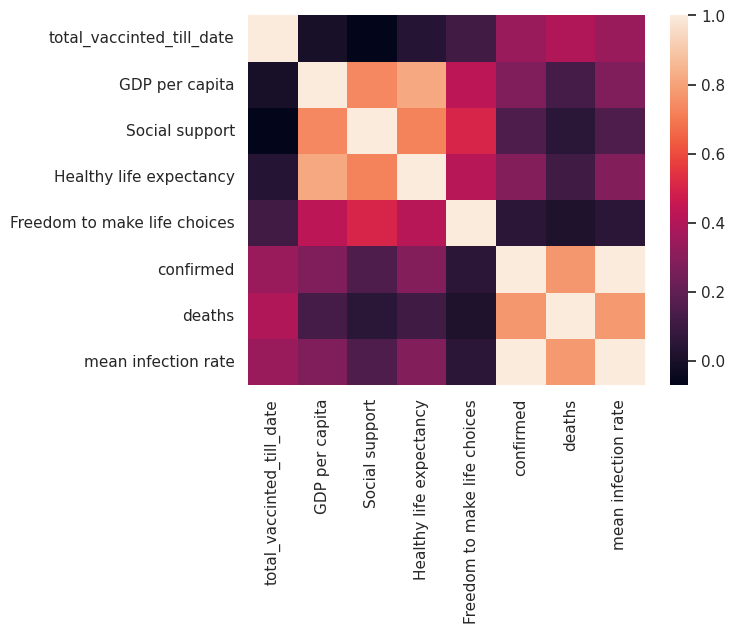

In [ ]:
sns.heatmap(datar.corr())

# Visualization of the results

Plotting GDP vs maximum Infection rate

In [ ]:
x = data['GDP per capita'].values
y = data['mean infection rate'].values
sns.scatterplot(x,y)    #VISUALISATION IS DIFFICULT BECAUSE OF DIFFERENCE Y SCALE AND X-SCALE

TypeError: ignored

In [ ]:
x = data['GDP per capita']
y = data['mean infection rate']
sns.scatterplot(x,np.log(y))

TypeError: ignored

In [ ]:
sns.regplot(x,np.log(y))

TypeError: ignored

# Plotting Social support vs maximum Infection rate

In [ ]:
x = data['Social support'].values
y = data['mean infection rate'].values
sns.scatterplot(x,np.log(y))

In [ ]:
sns.regplot(x,np.log(y))

# Plotting Healthy life expectancy vs maximum Infection rate

In [ ]:
x = data['Healthy life expectancy']
y = data['mean infection rate']
sns.scatterplot(x,np.log(y))

In [ ]:
sns.regplot(x,np.log(y))

# Plotting Freedom to make life choices vs maximum Infection rate

In [ ]:
x = data['Freedom to make life choices']
y = data['mean infection rate']
sns.scatterplot(x,np.log(y))

In [ ]:
sns.regplot(x,np.log(y))

# Performing linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [ ]:
x = datax.iloc[:, -6].values #GDP
y = datax.iloc[:, -1].values #deaths
x= x.reshape(-1,1)
regression_model.fit(x,y) #GDP vs Deaths

LinearRegression()

In [ ]:
y_predicted = regression_model.predict(x)

In [ ]:
from sklearn.metrics import mean_squared_error ,r2_score
mse = mean_squared_error(y,y_predicted)

In [ ]:
mse

0.03423406553713447

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)

In [ ]:
rmse

0.18502449982944008

In [ ]:
r2

0.021810977670700837

# GDP alone cannot explain variance of deaths


In [ ]:
m = 0
c = 0
L = 0.00001
epochs = 10000 #the number of iterations to perform gradiation
X = datax.iloc[:, -6].values #attributes to determine dependant variable/ Class
Y = datax.iloc[:, -1].values #dependant variable/ Class
n = float(len(X))
n

118.0

In [ ]:
for i in range(epochs):
    Y_pred = m*X + c #The current predicted value of Y
    D_m = (-2/n) * sum(X* (Y - Y_pred)) # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred) # Derivative of c
    m = m - L* D_m # Update m
    c = c - L*D_c # Update c
print (m,c)

0.012782434624699265 0.01666469785760278


Text(0, 0.5, 'Y')

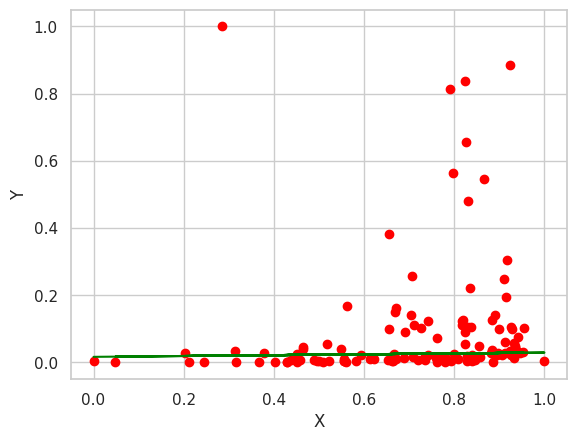

In [ ]:
Y_pred = m*X + c
plt.scatter(X,Y,color = "red")
plt.plot(X,Y_pred,color = "green")
plt.xlabel("X")
plt.ylabel("Y")

# Outliers of the Data Frame

# Social support index vs Deaths due to covid

In [ ]:
x = datax.iloc[:, -5].values #attributes to determine dependant variable/ Class
y = datax.iloc[:, -1].values #dependant variable/ Class
x= x.reshape(-1,1)
regression_model.fit(x,y)

LinearRegression()

In [ ]:
y_predicted = regression_model.predict(x)

In [ ]:
mse = mean_squared_error(y,y_predicted)
mse

0.03221366156447858

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)
r2

0.07954110570877215

# Healthy Life Expectancy Vs Deaths due to covid

In [ ]:
x = datax.iloc[:, -4].values #attributes to determine dependant variable/ Class
y = datax.iloc[:, -1].values #dependant variable/ Class
x= x.reshape(-1,1)
regression_model.fit(x,y)
y_predicted = regression_model.predict(x)
mse = mean_squared_error(y,y_predicted)
mse

0.034898940997130805

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)
r2

0.002813120828980331

In [ ]:
datar.head(10)

,total_vaccinted_till_date,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,confirmed,deaths,mean infection rate
China,3250342496,1.508,0.958,0.705,0.656,4903524,101056,4241.786047
India,1829085487,1.167,0.376,0.471,0.647,44690738,530779,41562.672558
Brazil,411378534,1.462,1.044,0.615,0.546,37085675,699310,33796.540465
Indonesia,373213575,1.382,0.883,0.539,0.620,6738225,160941,6251.331163
Japan,251739703,1.835,1.089,0.866,0.537,33329551,73046,27275.906047
Bangladesh,232845439,1.060,0.614,0.581,0.622,2037871,29445,1895.000000
Pakistan,217745032,1.049,0.413,0.374,0.448,1577411,30644,1465.834419
Vietnam,201816053,1.252,0.932,0.611,0.707,11526994,43186,10721.194419
Mexico,190175636,1.552,0.886,0.623,0.621,7483444,333188,6729.736744
Germany,171903993,1.924,1.088,0.776,0.585,38249060,168935,34762.666977


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datar)

In [ ]:
from pandas import DataFrame
data_scaled = DataFrame(scaled)
data_scaled.head()

,0,1,2,3,4,5,6,7
0,1.000000,0.701722,0.725758,0.761481,0.886486,0.109567,0.144355,0.101902
1,0.562662,0.543043,0.284848,0.414815,0.874324,1.000000,0.758961,1.000000
2,0.126417,0.680316,0.790909,0.628148,0.737838,0.829800,1.000000,0.813114
3,0.114673,0.643090,0.668939,0.515556,0.837838,0.150627,0.230005,0.150260
4,0.077294,0.853886,0.825000,1.000000,0.725676,0.745738,0.104294,0.656200


In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
from sklearn.metrics import mean_squared_error ,r2_score

x = data_scaled.iloc[:, -7].values #total vaccinated
y = data_scaled.iloc[:, -1].values #deaths
x=x.reshape(-1,1)
regression_model.fit(x,y)
y_predicted = regression_model.predict(x)
mse = mean_squared_error(y,y_predicted)
mse

0.032387633461028006

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)
r2
print(rmse)

0.17996564522438166


In [ ]:
x = data_scaled.iloc[:, -7].values #attributes to determine dependant variable/ Class
y = data_scaled.iloc[:, -2].values #confirmed
x=x.reshape(-1,1)
regression_model.fit(x,y)
y_predicted = regression_model.predict(x)
mse = mean_squared_error(y,y_predicted)
np.sqrt(mse)

0.14088245752633885

In [ ]:
rmse = np.sqrt(mean_squared_error(y,y_predicted))
r2 = r2_score(y,y_predicted)
r2

0.015409503089978904

# Multinomial regression

# Performing multinomial regreesion on (Vaccination,GDP) vs Deaths due to Covid


In [ ]:
data_scaled

,0,1,2,3,4,5,6,7
0,1.000000,0.701722,0.725758,0.761481,0.886486,0.109567,0.144355,0.101902
1,0.562662,0.543043,0.284848,0.414815,0.874324,1.000000,0.758961,1.000000
2,0.126417,0.680316,0.790909,0.628148,0.737838,0.829800,1.000000,0.813114
3,0.114673,0.643090,0.668939,0.515556,0.837838,0.150627,0.230005,0.150260
4,0.077294,0.853886,0.825000,1.000000,0.725676,0.745738,0.104294,0.656200
...,...,...,...,...,...,...,...,...
113,0.000215,0.855282,0.885606,0.885926,0.917568,0.002458,0.001005,0.002432
114,0.000087,0.601210,0.664394,0.241481,0.518919,0.003657,0.005671,0.003638
115,0.000077,0.900884,1.000000,0.906667,0.970270,0.004507,0.000197,0.004482
116,0.000037,0.731968,0.775000,0.693333,0.621622,0.006290,0.003837,0.006201


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
X = data_scaled[[0,1]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = data_scaled[6]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Yp = regr.predict(X)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('R sqaure: \n')
print(regr.score(X, Y))
rmse = np.sqrt(mean_squared_error(Y,Yp))
print(rmse)

Intercept: 
 -0.010830931409421943
Coefficients: 
 [0.53113345 0.09559658]
R sqaure: 

0.17106774642922618
0.1292672822098202


# Performing multinomial regreesion on (Vaccination,GDP) vs Deaths due to Covid using stastical models

In [ ]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      6   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     11.87
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.06e-05
Time:                        04:32:21   Log-Likelihood:                 73.978
No. Observations:                 118   AIC:                            -142.0
Df Residuals:                     115   BIC:                            -133.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0108      0.046     -0.237      0.8

# Polynomial Regression

In [ ]:
X = data_scaled[0] # Vaccinated list of different countries
Y =data_scaled[5] # Covid Confirmed cases

# Polynomial regression (Vaccinations vs Confirmed cases)

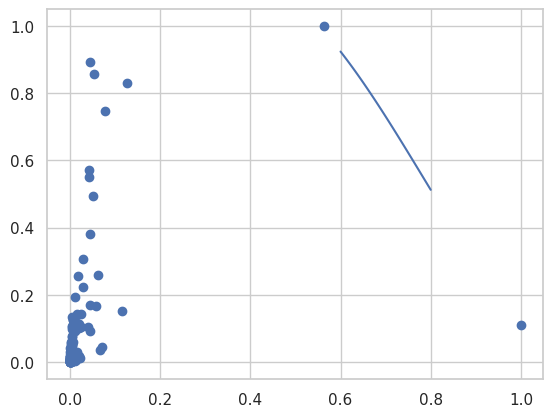

In [ ]:
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0.6, 0.8, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()

# Rsquare value of Vaccinations vs Confirmed cases

In [ ]:
print(r2_score(Y, mymodel(X)))

0.5840211736283518


# Polynomial regression (Vaccinations vs Deaths)

In [ ]:
X = data_scaled[0] #Vaccinated list
Y =data_scaled[6] # Deaths  due to covid

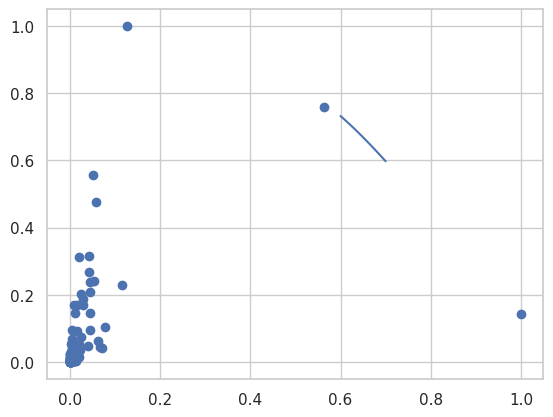

R2 value of Vaccinations vs Deaths:
0.6228349689478457


In [ ]:
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0.6, 0.7, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()
print("R2 value of Vaccinations vs Deaths:")
print(r2_score(Y, mymodel(X)))

# Polynomial Regression (GDP vs social support)¶

In [ ]:
X = data_scaled[1]
Y =data_scaled[2]

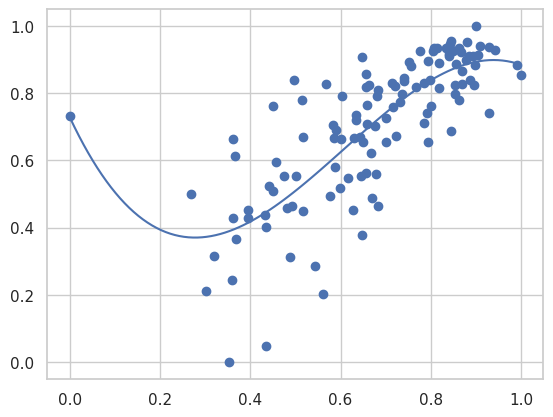

R2 value of Gdp vs social support:
0.6252006095055389


In [ ]:
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0, 1, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()
print("R2 value of Gdp vs social support:")
print(r2_score(Y, mymodel(X)))

# Polynomial Regression (GDP vs Health Life expectancy)

In [ ]:
X = data_scaled[1] #GDP
Y =data_scaled[3] #HLP

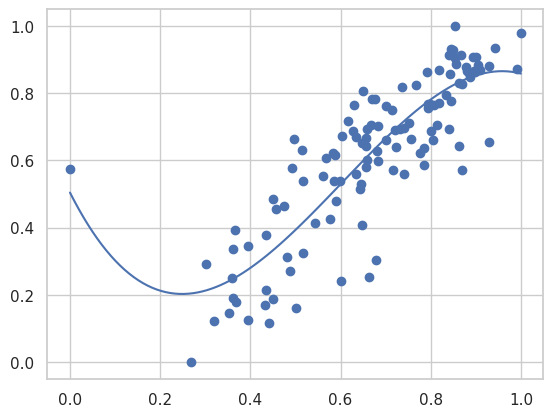

R2 value of gdp vs HLP:
0.7405785321505783
0.11852977603333867


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0, 1, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()
print("R2 value of gdp vs HLP:")
print(r2_score(Y, mymodel(X)))
rmse = np.sqrt(mean_squared_error(Y, mymodel(X)))
print(rmse)

# Polynomial Regression (Social Support vs HLP)

In [ ]:
X = data_scaled[2] #social support
Y =data_scaled[1] #HLP

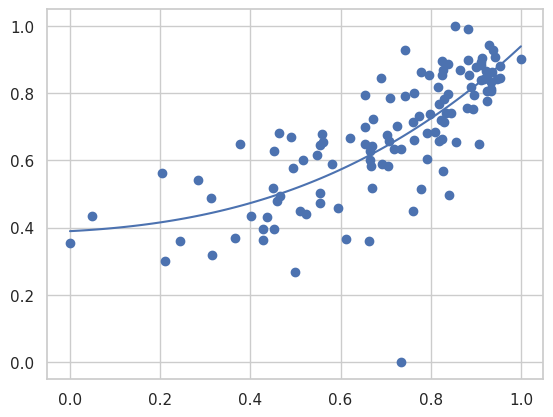

R2 social support vs HLP:
0.5713251527802622


In [ ]:
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0, 1, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()
print("R2 social support vs HLP:")
print(r2_score(Y, mymodel(X)))

# Polynomial Regression (Confirmed vs Deaths)

In [ ]:
X = data_scaled[5] #Confirmed
Y =data_scaled[6] #Deaths

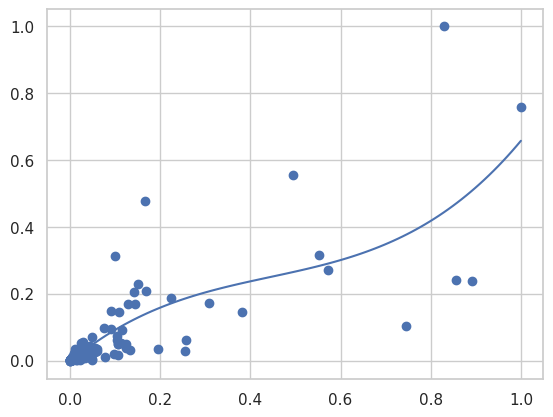

R2 Confirmed vs Deaths:
0.6127703830617796
0.08835138912536208


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(0, 1, 100)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()
print("R2 Confirmed vs Deaths:")
print(r2_score(Y, mymodel(X)))
rmse = np.sqrt(mean_squared_error(Y, mymodel(X)))
print(rmse)

In [ ]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0,0,0,0,0,0,0,0,0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0,0,0,0,1367,0,0,0,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642,4814582,3473523,139213,69579,57,31,23,4610,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,2022,3,25
86508,Zimbabwe,ZWE,2022-03-26,8791728,4886242,3487962,100086,83429,58,32,23,5528,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,2022,3,26
86509,Zimbabwe,ZWE,2022-03-27,8845039,4918147,3493763,53311,90629,58,32,23,6005,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,2022,3,27
86510,Zimbabwe,ZWE,2022-03-28,8934360,4975433,3501493,89321,100614,59,32,23,6667,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,2022,3,28


In [ ]:
df_new=pd.DataFrame(data=covid.get_data())
df_new.head()

,id,country,confirmed,active,deaths,recovered,latitude,longitude,last_update
0,187,US,103804263,None,1123836,None,40.000000,-100.000000,1678454462000
1,81,India,44690738,None,530779,None,20.593684,78.962880,1678454462000
2,64,France,39866718,None,166176,None,46.227600,2.213700,1678454462000
3,68,Germany,38249060,None,168935,None,51.165691,10.451526,1678454462000
4,25,Brazil,37085675,None,699310,None,-14.235000,-51.925300,1678454462000


In [ ]:
df_new.drop(['latitude','longitude','id','active','recovered','last_update'],axis=1,inplace=True)
df_new.head()

,country,confirmed,deaths
0,US,103804263,1123836
1,India,44690738,530779
2,France,39866718,166176
3,Germany,38249060,168935
4,Brazil,37085675,699310


In [ ]:
death = df_new['deaths'].tolist()

In [ ]:
series = pd.Series(death)

In [ ]:
series

0      1123836
1       530779
2       166176
3       168935
4       699310
        ...   
195         13
196          0
197          0
198          0
199          2
Length: 200, dtype: int64

In [ ]:
quantile_20 = series.quantile(0.20)
quantile_40 = series.quantile(0.40)
quantile_60 = series.quantile(0.60)
quantile_80 = series.quantile(0.80)

In [ ]:
quantile_70 = series.quantile(0.70)
quantile_70

12866.899999999969

In [ ]:
max(death)

1123836

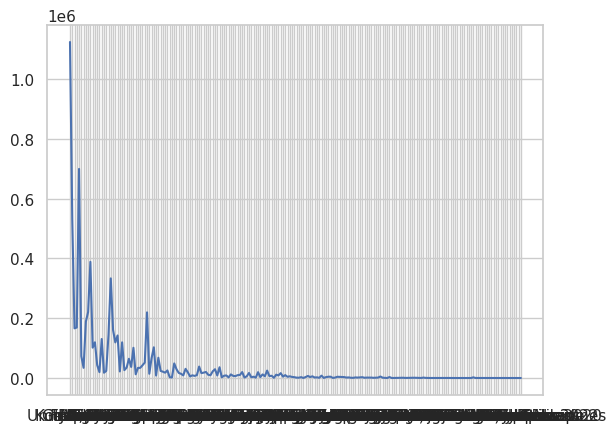

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_new['country'],df_new['deaths'])


In [ ]:
classes = []
ax=0
b=0
c=0
d,e = 0,0
for i in death:
  if(i<quantile_20):
    classes.append(0)
    ax+=1
  elif(i>=quantile_20 and i<=quantile_40):
    classes.append(1)
    b+=1
  elif(i>=quantile_40 and i<=quantile_60):
    classes.append(2)
    c+=1
  elif(i>=quantile_60 and i<=quantile_80):
    classes.append(3)
    d+=1
  else:
    classes.append(4)
    e+=1

print(ax)
print(b)
print(c)
print(d)
print(e)


40
40
40
40
40


In [ ]:
df_new['class'] = classes
df_new.head(25)

,country,confirmed,deaths,class
0,US,103804263,1123836,4
1,India,44690738,530779,4
2,France,39866718,166176,4
3,Germany,38249060,168935,4
4,Brazil,37085675,699310,4
5,Japan,33329551,73046,4
6,"Korea, South",30615522,34093,4
7,Italy,25603510,188322,4
8,United Kingdom,24658705,220721,4
9,Russia,22086064,388521,4


In [ ]:
df_new.set_index(['country'],inplace=True)
df_new.head()

,confirmed,deaths,class
country,,,
US,103804263,1123836,4
India,44690738,530779,4
France,39866718,166176,4
Germany,38249060,168935,4
Brazil,37085675,699310,4


In [ ]:
df_new.drop(['confirmed','deaths'],axis=1,inplace=True)
df_new

,class
country,
US,4
India,4
France,4
Germany,4
Brazil,4
...,...
Diamond Princess,0
Winter Olympics 2022,0
Holy See,0


In [ ]:
data_class = datar.join(df_new,how="inner")
data_class

,total_vaccinted_till_date,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,confirmed,deaths,mean infection rate,class
China,3250342496,1.508,0.958,0.705,0.656,4903524,101056,4241.786047,4
India,1829085487,1.167,0.376,0.471,0.647,44690738,530779,41562.672558,4
Brazil,411378534,1.462,1.044,0.615,0.546,37085675,699310,33796.540465,4
Indonesia,373213575,1.382,0.883,0.539,0.620,6738225,160941,6251.331163,4
Japan,251739703,1.835,1.089,0.866,0.537,33329551,73046,27275.906047,4
...,...,...,...,...,...,...,...,...,...
Malta,1246893,1.838,1.169,0.789,0.679,117610,828,108.292093,1
Namibia,831696,1.292,0.877,0.354,0.384,171156,4090,158.413953,2
Iceland,800598,1.936,1.320,0.803,0.718,209137,263,193.464186,1
Montenegro,668465,1.573,1.023,0.659,0.460,288808,2808,264.889302,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
X = data_class.drop("class", axis=1)
y = data_class["class"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333)

# Train the classifier

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)


# Predict the class labels
y_pred = clf1.predict(X_test)

# Evaluate the classifier
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.925


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(40, 5)

In [ ]:
label_binarizer.transform([0])

array([[1, 0, 0, 0, 0]])

In [ ]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

In [ ]:
clf0 = LogisticRegression()
clf0.fit(X_train, y_train)

y_pred = clf0.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.425


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.575


In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=10)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [ ]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 1.0}}

In [ ]:
clf0 = LogisticRegression()
clf0.fit(X_train, y_train)
evaluate(clf0, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 1  0  0  0  1]
 [ 1  0  0  2  8]
 [ 0  0  0  2 16]
 [ 0  0  0  0 20]
 [ 0  0  0  0 27]]
ACCURACY SCORE:
0.3590
CLASSIFICATION REPORT:
             0     1     2     3          4  accuracy  macro avg  weighted avg
precision  0.5   0.0   0.0   0.0   0.375000  0.358974   0.175000      0.142628
recall     0.5   0.0   0.0   0.0   1.000000  0.358974   0.300000      0.358974
f1-score   0.5   0.0   0.0   0.0   0.545455  0.358974   0.209091      0.201632
support    2.0  11.0  18.0  20.0  27.000000  0.358974  78.000000     78.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  0  0  0  1]
 [ 0  0  0  0  2]
 [ 0  0  0  0 12]
 [ 0  0  0  0 14]
 [ 1  0  0  0 10]]
ACCURACY SCORE:
0.2500
CLASSIFICATION REPORT:
             0    1     2     3          4  accuracy  macro avg  weighted avg
precision  0.0  0.0   0.0   0.0   0.256410      0.25   0.051282      0.070513
recall     0.0  0.0   0.0   0.0   0.909091      0.25   0.181818      0.250000
f1-score   0.0  0.0   0.0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/loca

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
evaluate(gnb, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 2  8  1  0  0]
 [ 0  6 12  0  0]
 [ 0  0  6 13  1]
 [ 0  0  0  6 21]]
ACCURACY SCORE:
0.7179
CLASSIFICATION REPORT:
                  0          1          2          3          4  accuracy  \
precision  0.500000   0.571429   0.631579   0.684211   0.954545  0.717949   
recall     1.000000   0.727273   0.666667   0.650000   0.777778  0.717949   
f1-score   0.666667   0.640000   0.648649   0.666667   0.857143  0.717949   
support    2.000000  11.000000  18.000000  20.000000  27.000000  0.717949   

           macro avg  weighted avg  
precision   0.668353      0.745014  
recall      0.764343      0.717949  
f1-score    0.695825      0.724682  
support    78.000000     78.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  6  6  0  0]
 [ 0  0  2 11  1]
 [ 0  0  0  1 10]]
ACCURACY SCORE:
0.7250
CLASSIFICATION REPORT:
             0         1      2          3          4  accuracy  macro avg  \
preci

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=2000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 27]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             0     1     2     3     4  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    2.0  11.0  18.0  20.0  27.0       1.0       78.0          78.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  2  9  1  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 11]]
ACCURACY SCORE:
0.9000
CLASSIFICATION REPORT:
             0         1          2          3     4  accuracy  macro avg  \
precision  0.0  0.400000   1.000000   0.933333   1.0       0.9   0.666667   
recall     0.0  1.000000   0.750000   1.000000   1.0       0.9   0.750000   
f1-score   0.0  0.571429   0.857143   0.965517   1.0 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=2000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 27]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             0     1     2     3     4  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    2.0  11.0  18.0  20.0  27.0       1.0       78.0          78.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  2  9  1  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 11]]
ACCURACY SCORE:
0.9000
CLASSIFICATION REPORT:
             0         1          2          3     4  accuracy  macro avg  \
precision  0.0  0.400000   1.000000   0.933333   1.0       0.9   0.666667   
recall     0.0  1.000000   0.750000   1.000000   1.0       0.9   0.750000   
f1-score   0.0  0.571429   0.857143   0.965517   1.0 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 27]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             0     1     2     3     4  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    2.0  11.0  18.0  20.0  27.0       1.0       78.0          78.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 1  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 11]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             0    1     2     3     4  accuracy  macro avg  weighted avg
precision  1.0  1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall     1.0  1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score   1.0  1.0   1.0   1.0   1.0       1.0        1.0       

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train, y_train)
evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 0  0  0  2  0]
 [ 0  0  0 11  0]
 [ 0  0  0 17  1]
 [ 0  0  0 19  1]
 [ 0  0  0 11 16]]
ACCURACY SCORE:
0.4487
CLASSIFICATION REPORT:
             0     1     2          3          4  accuracy  macro avg  \
precision  0.0   0.0   0.0   0.316667   0.888889  0.448718   0.241111   
recall     0.0   0.0   0.0   0.950000   0.592593  0.448718   0.308519   
f1-score   0.0   0.0   0.0   0.475000   0.711111  0.448718   0.237222   
support    2.0  11.0  18.0  20.000000  27.000000  0.448718  78.000000   

           weighted avg  
precision      0.388889  
recall         0.448718  
f1-score       0.367949  
support       78.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  0  0  1  0]
 [ 0  0  0  2  0]
 [ 0  0  0 12  0]
 [ 0  0  0 11  3]
 [ 0  0  0  1 10]]
ACCURACY SCORE:
0.5250
CLASSIFICATION REPORT:
             0    1     2          3          4  accuracy  macro avg  \
precision  0.0  0.0   0.0   0.407407   0.769231     0.525   0.235328   
recall     0.0

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [ ]:
ex_tree_clf = ExtraTreesClassifier()
bagging_clf = BaggingClassifier(base_estimator=ex_tree_clf, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)


evaluate(bagging_clf, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 27]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             0     1     2     3     4  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    2.0  11.0  18.0  20.0  27.0       1.0       78.0          78.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  3  8  1  0]
 [ 0  0  0 12  2]
 [ 0  0  0  1 10]]
ACCURACY SCORE:
0.8000
CLASSIFICATION REPORT:
             0         1          2          3          4  accuracy  \
precision  0.0  0.333333   1.000000   0.857143   0.833333       0.8   
recall     0.0  1.000000   0.666667   0.857143   0.909091       0.8   
f1-score   0.0  0.500000   0.800000   0.857143   0.869565       0.8   


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **Logistic+ others**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
logis = LogisticRegression()
logis.fit(X_train, y_train)


estimators = []
estimators.append(('logistic regression',logis))
ex_tree_clf = ExtraTreesClassifier(n_estimators=2000, max_features=7, random_state=10)
estimators.append(('Extra tree', ex_tree_clf))

#grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#estimators.append(('Gradient boosting', grad_boost_clf))

#tree = DecisionTreeClassifier()
#bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
#estimators.append(('Decision tree bagging', bagging_clf))



voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 1 10  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 27]]
ACCURACY SCORE:
0.9872
CLASSIFICATION REPORT:
                  0          1     2     3     4  accuracy  macro avg  \
precision  0.666667   1.000000   1.0   1.0   1.0  0.987179   0.933333   
recall     1.000000   0.909091   1.0   1.0   1.0  0.987179   0.981818   
f1-score   0.800000   0.952381   1.0   1.0   1.0  0.987179   0.950476   
support    2.000000  11.000000  18.0  20.0  27.0  0.987179  78.000000   

           weighted avg  
precision      0.991453  
recall         0.987179  
f1-score       0.988156  
support       78.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  2  9  1  0]
 [ 0  0  0 13  1]
 [ 1  0  0  0 10]]
ACCURACY SCORE:
0.8500
CLASSIFICATION REPORT:
             0         1          2          3          4  accuracy  \
precision  0.0  0.400000   1.000000   0.928571   0.909091      0.85   
recall     0.0  

# **Decision tree + others**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
Dtree = DecisionTreeClassifier()
estimators.append(('Decision tree', Dtree))
ex_tree_clf = ExtraTreesClassifier(n_estimators=2000, max_features=7, random_state=10)
estimators.append(('Extra tree', ex_tree_clf))

#grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#estimators.append(('Gradient boosting', grad_boost_clf))



#tree = DecisionTreeClassifier()
#bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
#estimators.append(('Decision tree bagging', bagging_clf))



voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 27]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             0     1     2     3     4  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    2.0  11.0  18.0  20.0  27.0       1.0       78.0          78.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  2  9  1  0]
 [ 0  0  0 13  1]
 [ 0  0  0  0 11]]
ACCURACY SCORE:
0.8750
CLASSIFICATION REPORT:
             0         1          2          3          4  accuracy  \
precision  0.0  0.400000   1.000000   0.928571   0.916667     0.875   
recall     0.0  1.000000   0.750000   0.928571   1.000000     0.875   
f1-score   0.0  0.571429   0.857143   0.928571   0.956522     0.875   


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **Random forest + others**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
#ex_tree_clf = ExtraTreesClassifier(n_estimators=2000, max_features=7, random_state=10)
#estimators.append(('Extra tree', ex_tree_clf))

#grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#estimators.append(('Gradient boosting', grad_boost_clf))

rf_clf = RandomForestClassifier(random_state=42, n_estimators=2000)
estimators.append(('Random forest classifier',rf_clf))

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
estimators.append(('Decision tree bagging', bagging_clf))



voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 27]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
             0     1     2     3     4  accuracy  macro avg  weighted avg
precision  1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall     1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score   1.0   1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    2.0  11.0  18.0  20.0  27.0       1.0       78.0          78.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  2 10  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 11]]
ACCURACY SCORE:
0.9250
CLASSIFICATION REPORT:
             0         1          2     3     4  accuracy  macro avg  \
precision  0.0  0.400000   1.000000   1.0   1.0     0.925   0.680000   
recall     0.0  1.000000   0.833333   1.0   1.0     0.925   0.766667   
f1-score   0.0  0.571429   0.909091   1.0   1.0     0.925   0.696104

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **Naive bayes + others**

In [ ]:
estimators = []
ex_tree_clf = ExtraTreesClassifier(n_estimators=2000, max_features=7, random_state=10)
estimators.append(('Extra tree', ex_tree_clf))

#grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
#estimators.append(('Gradient boosting', grad_boost_clf))

gnb = GaussianNB()
estimators.append(('naive bayes',gnb))

#tree = DecisionTreeClassifier()
#bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
#estimators.append(('Decision tree bagging', bagging_clf))



voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 2  0  0  0  0]
 [ 2  9  0  0  0]
 [ 0  6 12  0  0]
 [ 0  0  6 14  0]
 [ 0  0  0  6 21]]
ACCURACY SCORE:
0.7436
CLASSIFICATION REPORT:
                  0          1          2     3          4  accuracy  \
precision  0.500000   0.600000   0.666667   0.7   1.000000   0.74359   
recall     1.000000   0.818182   0.666667   0.7   0.777778   0.74359   
f1-score   0.666667   0.692308   0.666667   0.7   0.875000   0.74359   
support    2.000000  11.000000  18.000000  20.0  27.000000   0.74359   

           macro avg  weighted avg  
precision   0.693333      0.776923  
recall      0.792525      0.743590  
f1-score    0.720128      0.750945  
support    78.000000     78.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 0  1  0  0  0]
 [ 0  2  0  0  0]
 [ 0  7  5  0  0]
 [ 0  0  2 12  0]
 [ 0  0  0  1 10]]
ACCURACY SCORE:
0.7250
CLASSIFICATION REPORT:
             0         1          2          3          4  accuracy  \
precision  0.0  0.200000   0.714286  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
data_class

,total_vaccinted_till_date,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,confirmed,deaths,mean infection rate,class
China,3250342496,1.508,0.958,0.705,0.656,4903524,101056,4241.786047,4
India,1829085487,1.167,0.376,0.471,0.647,44690738,530779,41562.672558,4
Brazil,411378534,1.462,1.044,0.615,0.546,37085675,699310,33796.540465,4
Indonesia,373213575,1.382,0.883,0.539,0.620,6738225,160941,6251.331163,4
Japan,251739703,1.835,1.089,0.866,0.537,33329551,73046,27275.906047,4
...,...,...,...,...,...,...,...,...,...
Malta,1246893,1.838,1.169,0.789,0.679,117610,828,108.292093,1
Namibia,831696,1.292,0.877,0.354,0.384,171156,4090,158.413953,2
Iceland,800598,1.936,1.320,0.803,0.718,209137,263,193.464186,1
Montenegro,668465,1.573,1.023,0.659,0.460,288808,2808,264.889302,2


In [ ]:
data_class.shape

(118, 9)

In [ ]:
import pandas as pd

# Creating Empty DataFrame and Storing it in variable df
df = pd.DataFrame()

# Printing Empty DataFrame
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
data = [[51739703],[1.508],[1.044],[0.866],[0.546],[6738225],[73046],[6251.331163]]


In [ ]:
df = pd.DataFrame(data, columns=['total_vaccinted_till_date','GDP per capita','social support','Healthy life expectancy','Freedom to make life choices',''])